# Project - EDA on Berlin Rentals

## Let's remember cars dataset:
The dataset contains the information of 10.000 cars. There are 9 different columns:
- Make (Car brand, example: Ford)
- Model (The Model of the Car, example: Focus)
- Year (The Year in which the car was build, example: 2012)
- Variant (The car model version showing the PS, example: 1.6 Trendline)
- Kms (The kilometers the cars has been driven, example: 90000)
- Price (The offered price for the car, example: 10000)
- Doors (How many doors the car has, example: 4)
- Kind (Type of car, example: Pick-Up)
- Location (Where the car is located, example: Buenos Aires)

--- 
## The Task:

You want to find why some cars are more expensive than others. For this we will explore the different variables. 
1. Have a look at the variables and formulate for every variable a hypothesis, how the variable affects the price of the flat.
2. Create an analysis for every hypothesis. Show your conclusion with a plot. 
3. Write a short conclusion to every hypothesis test.

Some hints:
- Look at correlation plots and try to find patterns that explain the price of a car
- Try to use the hue variable to compare different categorical variables (e.g. condition)
- BONUS Try to create your own variables to extract one effect and seek to explain it

# We are looking for an affordable Family CAR

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

#pd.set_option('display.float_format', lambda x: '%.0f' % x)
#pd.reset_option('all')

import plotly.express as px
import plotly.figure_factory as ff #(create_distplot)

import warnings
warnings.simplefilter(action='ignore')

In [2]:
cars = pd.read_csv("cars_original.csv")
df = cars.copy()
df.head()

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location
0,Volkswagen,Vento,2012,2.5 Luxury 170cv,99950,360000,4.0,Sedán,Córdoba
1,Ford,Ranger,2012,2.3 Cd Xl Plus 4x2,140000,320000,2.0,Pick-Up,Entre Ríos
2,Volkswagen,Fox,2011,1.6 Trendline,132000,209980,5.0,Hatchback,Bs.as. G.b.a. Sur
3,Ford,Ranger,2017,3.2 Cd Xls Tdci 200cv Automática,13000,798000,4.0,Pick-Up,Neuquén
4,Volkswagen,Gol,2013,1.4 Power 83cv 3 p,107000,146000,3.0,Hatchback,Córdoba


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Make      10000 non-null  object 
 1   Model     10000 non-null  object 
 2   Year      10000 non-null  int64  
 3   Variant   10000 non-null  object 
 4   Kms       10000 non-null  int64  
 5   Price     10000 non-null  int64  
 6   Doors     10000 non-null  float64
 7   Kind      10000 non-null  object 
 8   Location  10000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 703.2+ KB


In [4]:
df.isna().sum()

Make        0
Model       0
Year        0
Variant     0
Kms         0
Price       0
Doors       0
Kind        0
Location    0
dtype: int64

In [5]:
df[df.duplicated()].count()

Make        249
Model       249
Year        249
Variant     249
Kms         249
Price       249
Doors       249
Kind        249
Location    249
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df[df.duplicated()].count()

Make        0
Model       0
Year        0
Variant     0
Kms         0
Price       0
Doors       0
Kind        0
Location    0
dtype: int64

In [8]:
from datetime import datetime
df['Age']= datetime.now().year - df['Year']
df.head(2)

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location,Age
0,Volkswagen,Vento,2012,2.5 Luxury 170cv,99950,360000,4.0,Sedán,Córdoba,10
1,Ford,Ranger,2012,2.3 Cd Xl Plus 4x2,140000,320000,2.0,Pick-Up,Entre Ríos,10


In [9]:
# Cleaning Sedán Furgón to "Sedan" and "Frugon"
df['Model'] = df['Model'].str.lower().str.replace('á', 'a').str.replace('ó', 'o')
# Put under score instead of blank
df.Model = df.Model.str.replace(' ', '_').str.replace('-', ('_'))

In [10]:
df['Kind'] = df['Kind'].str.lower().str.replace('á', 'a').str.replace('ó', 'o').str.replace('é', 'e')
# Put under score instead of blank
df.Kind = df.Kind.str.replace(' ', '_').str.replace('-', ('_'))
df.Kind.unique()

array(['sedan', 'pick_up', 'hatchback', 'suv', 'furgon', 'monovolumen',
       'coupe', 'cabriolet', 'rural', 'minivan'], dtype=object)

In [11]:
df.Kind = df.Kind.str.replace('monovolumen', 'minivan')
df.Kind.unique()

array(['sedan', 'pick_up', 'hatchback', 'suv', 'furgon', 'minivan',
       'coupe', 'cabriolet', 'rural'], dtype=object)

In [12]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df.describe()

,Year,Kms,Price,Doors,Age
count,9751.0,9751.0,9751.0,9751.0,9751.0
mean,2013.3,74394.1,349254.6,4.3,8.7
std,1.8,35179.0,176892.8,0.9,1.8
min,2011.0,5094.0,6300.0,2.0,4.0
25%,2012.0,49000.0,229200.0,4.0,7.0
50%,2013.0,73000.0,300000.0,5.0,9.0
75%,2015.0,97000.0,430000.0,5.0,10.0
max,2018.0,218000.0,2800000.0,5.0,11.0


In [13]:
df.groupby(df.Make, as_index=False).agg({"Price": ['mean', 'min', 'max'],
                                         'Age': ['mean', 'min', 'max' ],
                                        'Doors': ['min', 'max']}).sort_values([('Price', 'min')]).head(30)

Make    Price                  Age         Doors    
                     mean    min      max mean min max   min max
0       Chrysler 366845.8   6300  1100000 10.3   6  11   5.0 5.0
4     Volkswagen 335104.6   8000  1310000  8.8   4  11   2.0 5.0
1           Ford 352420.4   8500  2350000  8.5   4  11   2.0 5.0
2          Honda 382129.2  15000   999999  9.3   4  11   3.0 5.0
3  Mercedes Benz 517863.9  17500  2800000  8.6   4  11   2.0 5.0

In [16]:
dff = df.loc[(df.Price < 25000) & (df.Doors > 3)&(df.Kms < 70000)]
dff.groupby(df.Make, as_index=False).agg({"Price": ['count','mean', 'min', 'max'],
                                         'Age': ['mean', 'min', 'max' ],
                                        'Doors': ['min', 'max']}).sort_values([('Price', 'min')]).head(30)

Price                        Age         Doors    
  count    mean    min    max mean min max   min max
0    10 14400.0   8500  19000  7.0   4   9   4.0 5.0
3     5 14400.0  10000  20000  7.6   6  11   4.0 5.0
1     9 19622.2  15000  24500  7.1   5   9   4.0 5.0
2     2 19950.0  19900  20000  8.5   8   9   5.0 5.0

In [17]:
dff.describe()

,Year,Kms,Price,Doors,Age
count,26.0,26.0,26.0,26.0,26.0
mean,2014.7,39013.2,16634.6,4.7,7.3
std,1.7,17657.6,4206.2,0.5,1.7
min,2011.0,9000.0,8500.0,4.0,4.0
25%,2013.2,22248.8,13625.0,4.2,6.0
50%,2015.0,42500.0,17500.0,5.0,7.0
75%,2016.0,48750.0,20000.0,5.0,8.8
max,2018.0,69000.0,24500.0,5.0,11.0


<AxesSubplot:>

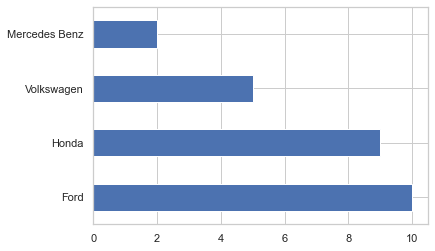

In [33]:
dff.Make.value_counts().plot.barh()

<AxesSubplot:>

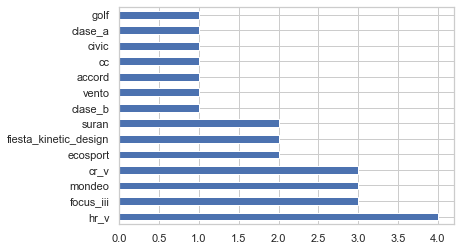

In [34]:
dff.Model.value_counts().plot.barh()

<AxesSubplot:>

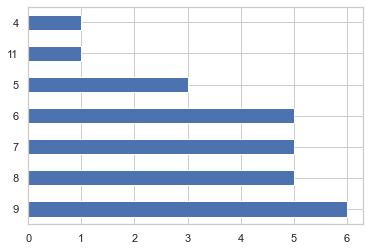

In [35]:
dff.Age.value_counts().plot.barh()

<AxesSubplot:>

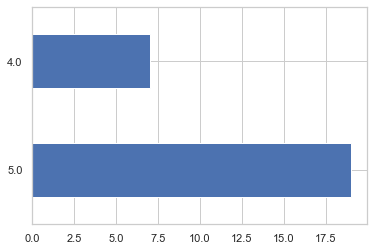

In [37]:
dff.Doors.value_counts().plot.barh()

<AxesSubplot:xlabel='Kms', ylabel='Price'>

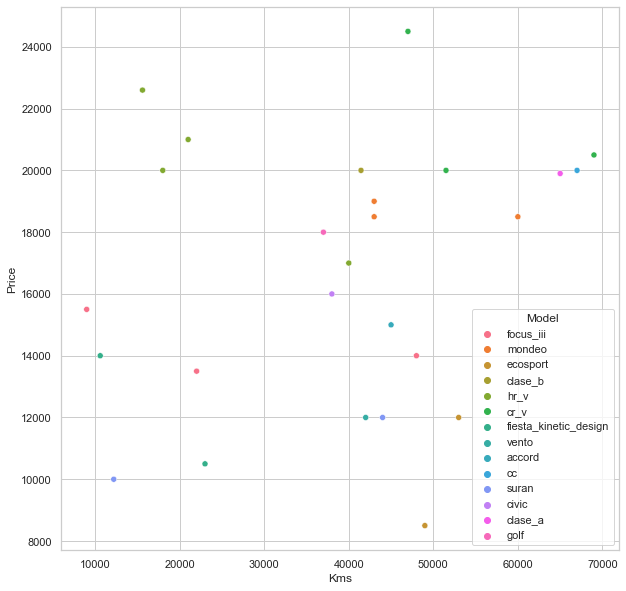

In [47]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Kms', y='Price', hue='Model',data=dff)

<AxesSubplot:xlabel='Age', ylabel='Price'>

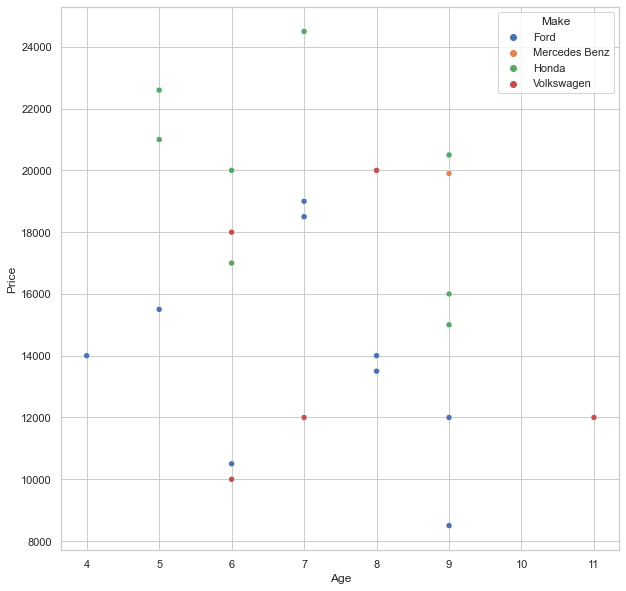

In [51]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Age', y='Price', hue='Make', data=dff)

In [104]:
# dictionary
Data = {'Year': ['2016', '2017', 
                 '2018', '2019'],
        'Inflation Rate': ['4.47', '5', 
                           '5.98', '4.1']}
# create a dataframe
df = pd.DataFrame(Data)
  
# converting each value 
# of column to a string
df['Inflation Rate'] = df['Inflation Rate'].astype(float)
  
# show the dataframe
print(df)
  
# show the datatypes
print (df.dtypes)

   Year  Inflation Rate
0  2016               4
1  2017               5
2  2018               6
3  2019               4
Year               object
Inflation Rate    float64
dtype: object


In [108]:
dff['Engine'] = dff.Variant.str[0:3].astype('float64')
dff.head()

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location,Age,Engine
202,Ford,focus_iii,2014,2.0 Titanium At6,48000,14000,5.0,hatchback,Bs.as. G.b.a. Norte,8,2.0
1777,Ford,mondeo,2015,2.5 Se At 170cv,60000,18500,4.0,sedan,Córdoba,7,2.5
2479,Ford,focus_iii,2014,2.0 Se Plus At6,22000,13500,5.0,hatchback,Capital Federal,8,2.0
2511,Ford,ecosport,2013,1.5 Se Tdci 90cv 4x2,53000,12000,5.0,suv,Mendoza,9,1.5
3137,Mercedes Benz,clase_b,2014,1.6 B200 City 156cv W246,41447,20000,5.0,minivan,Capital Federal,8,1.6


In [107]:
dff[dff.Engine < 2.0].sort_values('Price')

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location,Age,Engine
5575,Ford,ecosport,2013,1.6 Titanium 110cv 4x2,49000,8500,5.0,suv,Capital Federal,9,1.6
8106,Volkswagen,suran,2016,1.6 Comfortline 101cv,12200,10000,5.0,minivan,Bs.as. G.b.a. Oeste,6,1.6
5644,Ford,fiesta_kinetic_design,2016,1.6 Se Plus 120cv,22995,10500,5.0,hatchback,Bs.as. G.b.a. Oeste,6,1.6
2511,Ford,ecosport,2013,1.5 Se Tdci 90cv 4x2,53000,12000,5.0,suv,Mendoza,9,1.5
7432,Volkswagen,suran,2015,1.6 Highline Msi 110cv,44000,12000,5.0,minivan,Capital Federal,7,1.6
6165,Ford,fiesta_kinetic_design,2018,1.6 Se Plus 120cv,10600,14000,5.0,hatchback,Bs.as. G.b.a. Sur,4,1.6
9607,Ford,focus_iii,2017,1.6 S,9000,15500,5.0,hatchback,Bs.as. G.b.a. Oeste,5,1.6
9415,Honda,civic,2013,1.8 Exs At 140cv,38000,16000,4.0,sedan,Bs.as. Costa Atlántica,9,1.8
4990,Honda,hr_v,2016,1.8 Ex-l 2wd Cvt,40000,17000,5.0,suv,Chaco,6,1.8
9550,Volkswagen,golf,2016,1.4 Comfortline Tsi Dsg,37000,18000,5.0,hatchback,Río Negro,6,1.4


# Outlieries

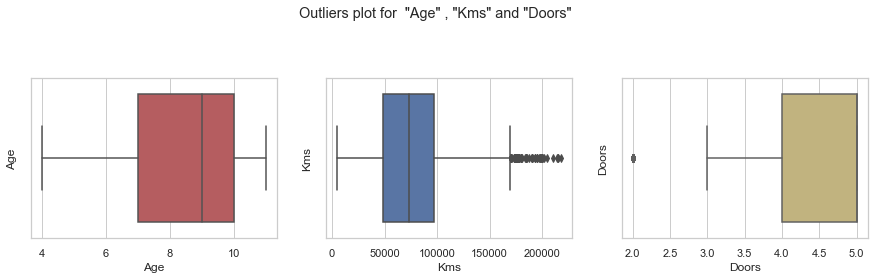

In [71]:
plt.figure(figsize=(15,10))

plt.subplot(3,3,1)
sns.boxplot(x=df.Age, color='r')
plt.ylabel('Age')

plt.subplot(3,3,2)
sns.boxplot(x=df.Kms, color='b')
plt.ylabel('Kms')

plt.subplot(3,3,3)
sns.boxplot(x=df.Doors, color='y')
plt.ylabel('Doors')
plt.suptitle('Outliers plot for  "Age" , "Kms" and "Doors"')

plt.show()

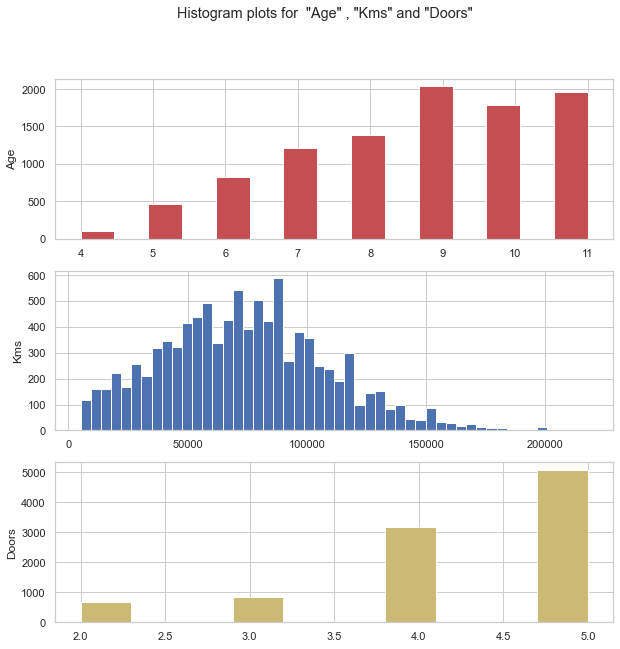

In [73]:
plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
plt.hist(x=df.Age, color='r', bins=15)
plt.ylabel('Age')


plt.subplot(3,1,2)
plt.hist(x=df.Kms, color='b', bins=50)
plt.ylabel('Kms')

plt.subplot(3,1,3)
plt.hist(x=df.Doors, color='y')
plt.ylabel('Doors')
plt.suptitle('Histogram plots for  "Age" , "Kms" and "Doors"')

plt.show()

# Distribution of categorical values

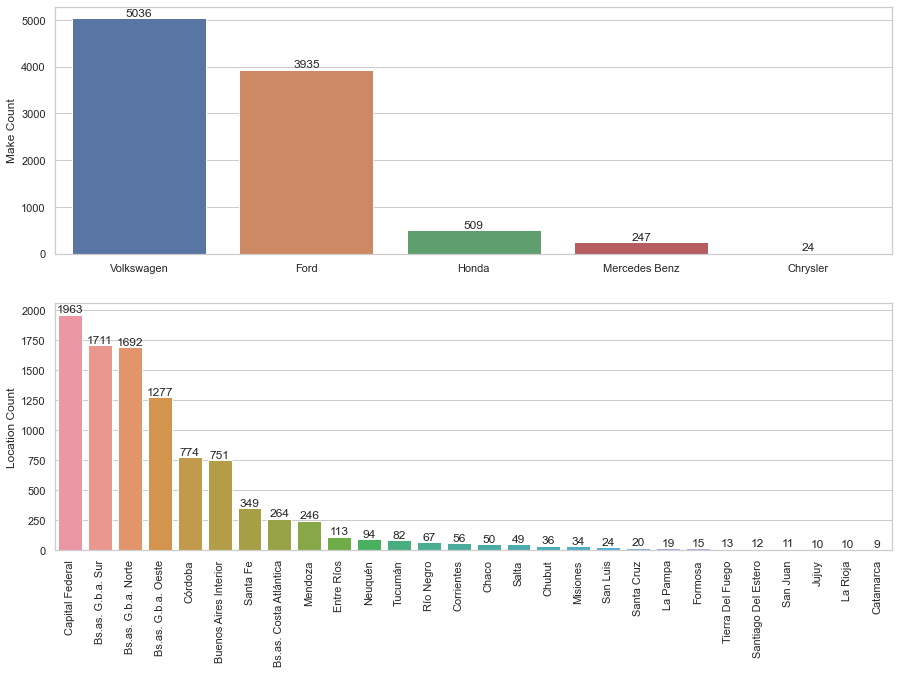

In [24]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
x = df.Make.value_counts().index
y = [df.Make.value_counts()[i] for i in x ]
ax = sns.barplot(x,y)
plt.ylabel('Make Count')
ax.bar_label(ax.containers[0])


plt.subplot(2,1,2)
x = df.Location.value_counts().index
y = [df.Location.value_counts()[i] for i in x ]
ax = sns.barplot(x,y)
plt.xticks(rotation=90)
plt.ylabel('Location Count')
ax.bar_label(ax.containers[0])

plt.show()

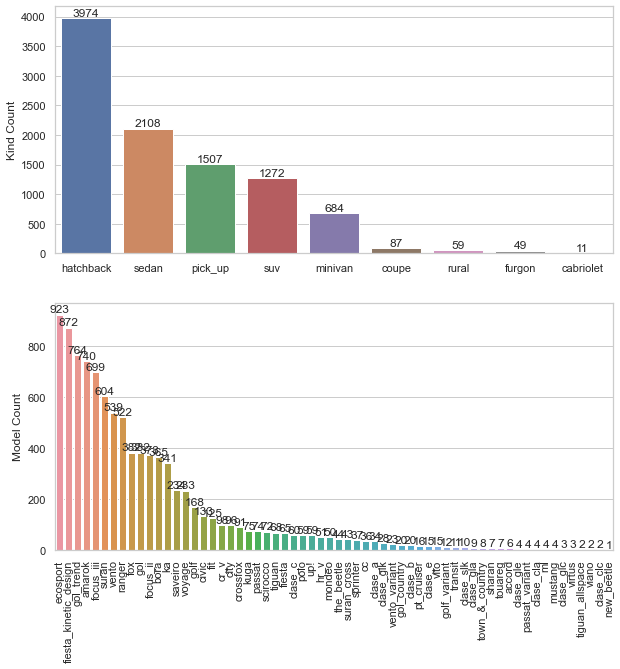

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
x = df.Kind.value_counts().index
y = [df.Kind.value_counts()[i] for i in x ]
ax = sns.barplot(x,y)
plt.ylabel('Kind Count')
ax.bar_label(ax.containers[0])

plt.subplot(2,1,2)
x = df.Model.value_counts().index
y = [df.Model.value_counts()[i] for i in x ]
ax = sns.barplot(x,y)
plt.xticks(rotation=90)
plt.ylabel('Model Count')
ax.bar_label(ax.containers[0])

plt.show()

# Anova Table (Price - Make)

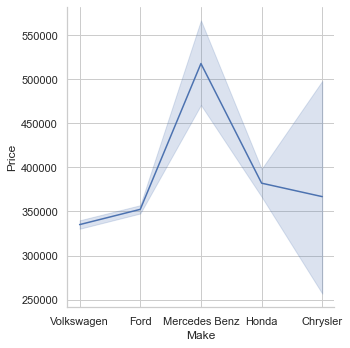

In [66]:
sns.relplot(x='Make', y='Price', data=df, kind='line');

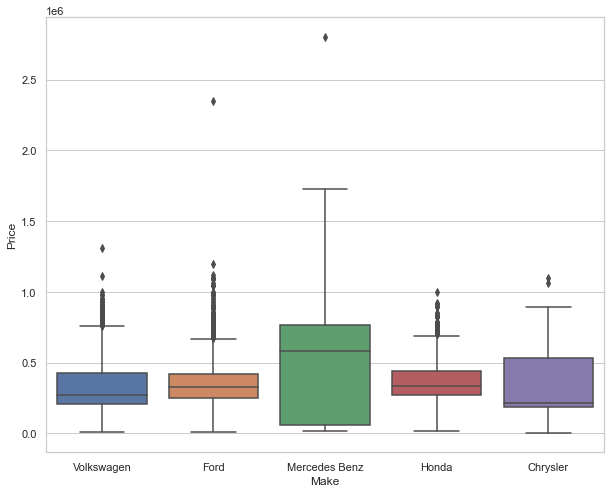

In [68]:
# generate a boxplot to see the data distribution by Make and ages. Using boxplot, we can easily detect the 
# differences between different groups
plt.figure(figsize=(10,8))
sns.boxplot(x="Make", y="Price", data=df) ;

In [56]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Ho = "Make has no effect on Price "   # Stating the Null Hypothesis
Ha = "Make has an effect on Price"   # Stating the Alternate Hypothesis

model = ols('Price ~  C(Make) + C(Model) + C(Kind)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
p_value = anova_table['PR(>F)'][0]

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

anova_table

Make has an effect on Price as the p_value (0.0) < 0.05


,sum_sq,df,F,PR(>F)
C(Make),1.331954e+12,4.0,30.315841,4.130324e-25
C(Model),1.425914e+14,61.0,212.815947,0.000000e+00
C(Kind),2.731284e+12,8.0,31.082605,1.476342e-48
Residual,1.063688e+14,9684.0,NaN,NaN


In [61]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Ho = "Make has no effect on Price "   # Stating the Null Hypothesis
Ha = "Make has an effect on Price"   # Stating the Alternate Hypothesis

model = ols('Price ~  C(Make) ', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
p_value = anova_table['PR(>F)'][0]

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

anova_table

Make has an effect on Price as the p_value (0.0) < 0.05


,sum_sq,df,F,PR(>F)
C(Make),8.627262e+12,4.0,70.904272,2.721542e-59
Residual,2.964606e+14,9746.0,NaN,NaN


In [62]:
model.

Intercept                   366845.833333
C(Make)[T.Ford]             -14425.462812
C(Make)[T.Honda]             15283.351343
C(Make)[T.Mercedes Benz]    151018.037112
C(Make)[T.Volkswagen]       -31741.215383
dtype: float64

In [58]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Ho = "Make has no effect on Price "   # Stating the Null Hypothesis
Ha = "Make has an effect on Price"   # Stating the Alternate Hypothesis

model = ols('Price ~  C(Model) ', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
p_value = anova_table['PR(>F)'][0]

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

anova_table

Make has an effect on Price as the p_value (0.0) < 0.05


,sum_sq,df,F,PR(>F)
C(Model),1.977195e+14,61.0,292.497579,0.0
Residual,1.073684e+14,9689.0,NaN,NaN


In [74]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Ho = "Kind has no effect on Price "   # Stating the Null Hypothesis
Ha = "Kind has an effect on Price"   # Stating the Alternate Hypothesis

model = ols('Price ~  C(Kind) ', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
p_value = anova_table['PR(>F)'][0]

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

anova_table

Kind has an effect on Price as the p_value (0.0) < 0.05


,sum_sq,df,F,PR(>F)
C(Kind),93869804073697,8,541,0
Residual,211218063645990,9742,NaN,NaN


# Chi_square test (Kind - Make)

In [75]:
import scipy.stats as stats
# Chi_square test to check if smoking habits are different for different genders
Ho = "Model has no effect on Make "   # Stating the Null Hypothesis
Ha = "Model has an effect on Make"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df.Model, df.Kind)

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Model has an effect on Make as the p_value (0.0) < 0.05


Kind,cabriolet,coupe,furgon,hatchback,minivan,pick_up,rural,sedan,suv
Model,,,,,,,,,
accord,0,0,0,0,0,0,0,6,0
amarok,0,0,0,0,0,740,0,0,0
bora,0,0,0,0,0,0,0,365,0
cc,0,0,0,0,0,0,0,36,0
city,0,0,0,0,0,0,0,96,0
...,...,...,...,...,...,...,...,...,...
vento_variant,0,0,0,0,0,0,23,0,0
viano,0,0,0,0,2,0,0,0,0
virtus,0,0,0,0,0,0,0,3,0


# Anova Table (Age - Kind)

In [47]:
Ho = "Model has no effect on Age "   # Stating the Null Hypothesis
Ha = "Model has an effect on Age"   # Stating the Alternate Hypothesis

model = ols('Age ~ C(Model)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
p_value = anova_table['PR(>F)'][0]

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

anova_table

Model has an effect on Age as the p_value (0.0) < 0.05


,sum_sq,df,F,PR(>F)
C(Model),10461.313073,61.0,76.476331,0.0
Residual,21727.425928,9689.0,NaN,NaN


In [48]:
df.corr()

,Year,Kms,Price,Doors,Age
Year,1.000000,-0.683185,0.446048,-0.028695,-1.000000
Kms,-0.683185,1.000000,-0.160521,-0.072197,0.683185
Price,0.446048,-0.160521,1.000000,-0.110242,-0.446048
Doors,-0.028695,-0.072197,-0.110242,1.000000,0.028695
Age,-1.000000,0.683185,-0.446048,0.028695,1.000000


In [78]:
df.head(15)

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location,Age
0,Volkswagen,vento,2012,2.5 Luxury 170cv,99950,360000,4,sedan,Córdoba,10
1,Ford,ranger,2012,2.3 Cd Xl Plus 4x2,140000,320000,2,pick_up,Entre Ríos,10
2,Volkswagen,fox,2011,1.6 Trendline,132000,209980,5,hatchback,Bs.as. G.b.a. Sur,11
3,Ford,ranger,2017,3.2 Cd Xls Tdci 200cv Automática,13000,798000,4,pick_up,Neuquén,5
4,Volkswagen,gol,2013,1.4 Power 83cv 3 p,107000,146000,3,hatchback,Córdoba,9
5,Volkswagen,amarok,2014,2.0 Cd Tdi 180cv 4x4 Highline C34,115000,790000,4,pick_up,Buenos Aires Interior,8
6,Ford,ka,2012,1.0 Fly Viral 63cv,95243,142000,3,hatchback,Bs.as. G.b.a. Sur,10
7,Ford,ka,2012,1.6 Fly Viral 95cv,110000,148000,3,hatchback,Buenos Aires Interior,10
8,Ford,focus_iii,2017,1.6 S,17500,367000,5,hatchback,Buenos Aires Interior,5
9,Ford,fiesta_kinetic_design,2014,1.6 Sedan Titanium Powershift 120cv,43000,287000,4,sedan,Bs.as. G.b.a. Norte,8


In [87]:
df.groupby('Location', as_index=False).agg({"Price": ['mean', 'median','min', 'max', 'count']}).sort_values([('Price', 'mean')], ascending=False)

Location  Price                              
                             mean median     min      max count
15                La Rioja 453905 475000  177000   850000    10
17                Misiones 438134 417500  155000   770000    34
18                 Neuquén 397867 360000  135000  1200000    94
6                Catamarca 397778 410000  240000   600000     9
20                   Salta 396053 355000  150000   800000    49
8                   Chubut 390472 340000  130000   800000    36
11              Entre Ríos 389886 340000  148000  1200000   113
12                 Formosa 385667 350000  140000   850000    15
21                San Juan 375818 315000  159000   680000    11
9               Corrientes 375054 347500  145000   900000    56
26        Tierra Del Fuego 370615 330000  215000   720000    13
25     Santiago Del Estero 370000 392500  130000   560000    12
24                Santa Fe 369802 330000    6300  1050000   349
19               Río Negro 367560 370000   18000   750000    67
4    Buenos Aires Interior 366593 320000   16000  1050000   751
10                 Córdoba 362512 320000   11000  1725000   774
7                    Chaco 361300 335000   17000   830000    50
0   Bs.as. Costa Atlántica 358878 305000   11200   980000   264
1      Bs.as. G.b.a. Norte 353642 300000    8000  2350000  1692
14                La Pampa 353368 294000   20000   715000    19
16                 Mendoza 347120 290000   12000  1100000   246
5          Capital Federal 341779 300000    8500  1499990  1963
2      Bs.as. G.b.a. Oeste 339813 289000   10000  1310000  1277
22                San Luis 337875 245000   15000   675000    24
13                   Jujuy 331775 305000  200000   580000    10
3        Bs.as. G.b.a. Sur 330748 285000   14000  2800000  1711
27                 Tucumán 318551 290000   59900   850000    82
23              Santa Cruz 314875 310000  161000   600000    20

In [86]:
df.loc[df.Model == 'ecosport']

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location,Age
18,Ford,ecosport,2012,1.6 My10 Xl Plus Mp3 4x2,110000,215000,5,suv,Bs.as. G.b.a. Oeste,10
71,Ford,ecosport,2017,1.6 Titanium 110cv 4x2,19500,565000,5,suv,Buenos Aires Interior,5
74,Ford,ecosport,2015,2.0 Titanium 143cv 4x2,69921,449000,5,suv,Capital Federal,7
112,Ford,ecosport,2015,1.6 Se 110cv 4x2,50928,369000,5,suv,Bs.as. G.b.a. Norte,7
114,Ford,ecosport,2013,1.5 Se Tdci 90cv 4x2,51000,275000,5,suv,Bs.as. G.b.a. Sur,9
...,...,...,...,...,...,...,...,...,...,...
9977,Ford,ecosport,2013,1.6 Se 110cv 4x2,86000,325000,5,suv,Bs.as. G.b.a. Norte,9
9979,Ford,ecosport,2011,1.6 My10 Xl Plus Mp3 4x2,65000,230000,5,suv,Buenos Aires Interior,11
9980,Ford,ecosport,2013,2.0 Se 143cv 4x2,70900,355000,5,suv,Bs.as. G.b.a. Sur,9
9989,Ford,ecosport,2014,1.5 Se Tdci 90cv 4x2,48000,380000,5,suv,Bs.as. G.b.a. Oeste,8


In [91]:
df.describe()

,Year,Kms,Price,Doors,Age
count,9751,9751,9751,9751,9751
mean,2013,74394,349255,4,9
std,2,35179,176893,1,2
min,2011,5094,6300,2,4
25%,2012,49000,229200,4,7
50%,2013,73000,300000,5,9
75%,2015,97000,430000,5,10
max,2018,218000,2800000,5,11


In [90]:
import statsmodels.stats.api as sms
# confidence interval (guven araligi)
df.Price

sms.DescrStatsW(df.Price).tconfint_mean()  

(345743.1247265733, 352766.04253832257)

In [96]:
import researchpy as rp
rp.summary_cont(df[['Price', 'Kms', 'Age', 'Doors']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Price,9751,349255,176893,1791,345743,352766
1,Kms,9751,74394,35179,356,73696,75092
2,Age,9751,9,2,0,9,9
3,Doors,9751,4,1,0,4,4


In [97]:
import scipy.stats as stats

# nobs = gozlem sayisi
# skewnes = carpiklik  (sag - sol)
# kurtosis = basiklik  (alt - ust)

stats.describe(df.Kms)

DescribeResult(nobs=9751, minmax=(5094, 218000), mean=74394.07947902779, variance=1237561791.9652722, skewness=0.40239887037876204, kurtosis=0.08549596004807247)

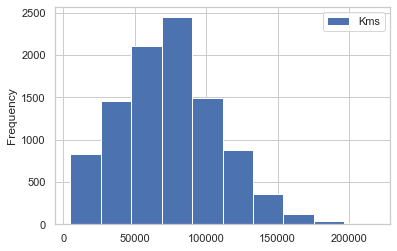

In [98]:
# histogram

pd.DataFrame(df.Kms).plot.hist();

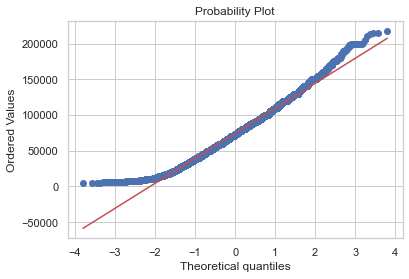

In [99]:
#qqplot
import pylab
stats.probplot(df.Kms, dist="norm", plot=pylab)
pylab.show()

In [19]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
df.corr()

,Year,Kms,Price,Doors,Age
Year,1.0000,-0.6832,0.4460,-0.0287,-1.0000
Kms,-0.6832,1.0000,-0.1605,-0.0722,0.6832
Price,0.4460,-0.1605,1.0000,-0.1102,-0.4460
Doors,-0.0287,-0.0722,-0.1102,1.0000,0.0287
Age,-1.0000,0.6832,-0.4460,0.0287,1.0000


In [26]:
df.cov()

,Year,Kms,Price,Doors,Age
Year,3.3014,-43668.8339,143364.4121,-0.0463,-3.3014
Kms,-43668.8339,1237561791.9653,-998905421.2736,-2256.4946,43668.8339
Price,143364.4121,-998905421.2736,31291063355.8668,-17325.4661,-143364.4121
Doors,-0.0463,-2256.4946,-17325.4661,0.7893,0.0463
Age,-3.3014,43668.8339,-143364.4121,0.0463,3.3014


In [22]:
df.describe()

,Year,Kms,Price,Doors,Age
count,9751.0000,9751.0000,9751.0000,9751.0000,9751.0000
mean,2013.2977,74394.0795,349254.5836,4.2985,8.7023
std,1.8170,35178.9965,176892.8019,0.8884,1.8170
min,2011.0000,5094.0000,6300.0000,2.0000,4.0000
25%,2012.0000,49000.0000,229200.0000,4.0000,7.0000
50%,2013.0000,73000.0000,300000.0000,5.0000,9.0000
75%,2015.0000,97000.0000,430000.0000,5.0000,10.0000
max,2018.0000,218000.0000,2800000.0000,5.0000,11.0000


In [25]:
df.var()

Year              3.3014
Kms      1237561791.9653
Price   31291063355.8670
Doors             0.7893
Age               3.3014
dtype: float64

<AxesSubplot:>

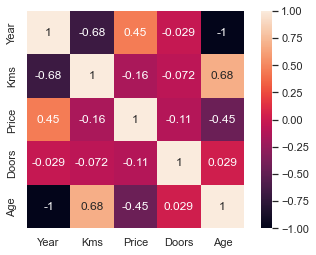

In [32]:
sns.heatmap(df.corr(), annot=True, square=True, fmt='.2g')

In [35]:
from scipy.stats import jarque_bera

In [72]:
from scipy.stats import jarque_bera

jb, pvalue = jarque_bera(df.Age)
print("JB Age: %.3f" % jb , 'PVALUE: %.3f' % pvalue)

JB Age: 565.603 PVALUE: 0.000


In [71]:
from scipy.stats import shapiro

jb, pvalue = shapiro(df.Age)
print("SH Age: %.3f" % sh , 'PVALUE: %.3f' % pvalue)

SH Age: 0.898 PVALUE: 0.000


In [68]:
from scipy.stats import spearmanr

corr , pvalue = spearmanr(df.Price, df.Age)
print("Corr PRICE_AGE : %.3f " % corr, "Pvalue PRICE_AGE : %.3f " % pvalue)

Corr PRICE_AGE : -0.485  Pvalue PRICE_AGE : 0.000 


In [64]:
df.corr()

,Year,Kms,Price,Doors,Age
Year,1.0000,-0.6832,0.4460,-0.0287,-1.0000
Kms,-0.6832,1.0000,-0.1605,-0.0722,0.6832
Price,0.4460,-0.1605,1.0000,-0.1102,-0.4460
Doors,-0.0287,-0.0722,-0.1102,1.0000,0.0287
Age,-1.0000,0.6832,-0.4460,0.0287,1.0000


In [69]:
df.corr(method='spearman')

,Year,Kms,Price,Doors,Age
Year,1.0000,-0.6798,0.4850,0.0013,-1.0000
Kms,-0.6798,1.0000,-0.2080,-0.0860,0.6798
Price,0.4850,-0.2080,1.0000,-0.1072,-0.4850
Doors,0.0013,-0.0860,-0.1072,1.0000,-0.0013
Age,-1.0000,0.6798,-0.4850,-0.0013,1.0000


In [73]:
df.skew()

Year     0.4885
Kms      0.4025
Price    1.5831
Doors   -1.2032
Age     -0.4885
dtype: float64

In [74]:
df.kurtosis()

Year    -0.6615
Kms      0.0862
Price    7.1601
Doors    0.6496
Age     -0.6615
dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Density'>

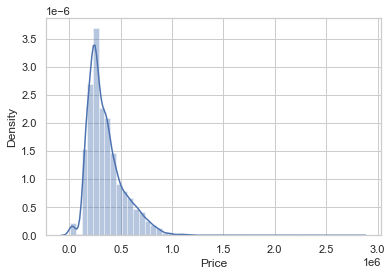

In [75]:
from scipy.stats import norm, lognorm, johnsonsu

sns.distplot(df.Price)

<AxesSubplot:xlabel='Price', ylabel='Density'>

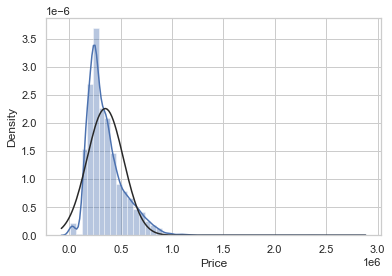

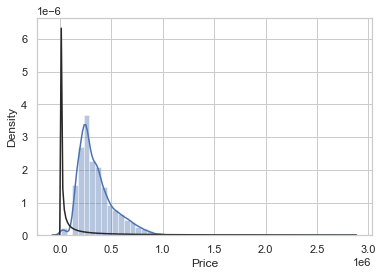

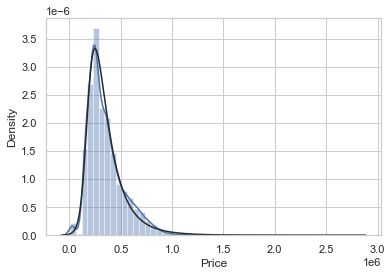

In [79]:
plt.figure(1); sns.distplot(df.Price, fit=norm)
plt.figure(2); sns.distplot(df.Price, fit=lognorm)
plt.figure(3); sns.distplot(df.Price, fit=johnsonsu)

In [86]:
df.Doors.quantile([0.01,0.25,0.50,0.75,0.99])

0.0100   2.0000
0.2500   4.0000
0.5000   5.0000
0.7500   5.0000
0.9900   5.0000
Name: Doors, dtype: float64

In [107]:
cars = pd.read_csv("cars_original.csv")
df = cars.copy()
df['Age'] = 2022 - df.Year
df.head(1)

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location,Age
0,Volkswagen,Vento,2012,2.5 Luxury 170cv,99950,360000,4.0000,Sedán,Córdoba,10


In [112]:
df.describe()

,Year,Kms,Price,Doors,Age
count,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000
mean,2013.2938,74483.3384,349545.4545,4.2958,8.7062
std,1.8160,35150.2800,177339.5875,0.8898,1.8160
min,2011.0000,5094.0000,6300.0000,2.0000,4.0000
25%,2012.0000,49500.0000,229000.0000,4.0000,7.0000
50%,2013.0000,73000.0000,300000.0000,5.0000,9.0000
75%,2015.0000,97000.0000,430000.0000,5.0000,10.0000
max,2018.0000,218000.0000,2800000.0000,5.0000,11.0000


In [125]:
df_outlier.describe()

,Year,Kms,Price,Doors,Age
count,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000
mean,2013.2938,74337.2936,349545.4545,4.2958,8.7062
std,1.8160,34702.7604,177339.5875,0.8898,1.8160
min,2011.0000,5094.0000,6300.0000,2.0000,4.0000
25%,2012.0000,49500.0000,229000.0000,4.0000,7.0000
50%,2013.0000,73000.0000,300000.0000,5.0000,9.0000
75%,2015.0000,97000.0000,430000.0000,5.0000,10.0000
max,2018.0000,168250.0000,2800000.0000,5.0000,11.0000


In [108]:
df_outlier = df.copy()

In [127]:
def outlier_equal_zero(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75) #===>Sen karar ver
    IQR = Q3 - Q1 
    upper_bound = Q3 + (1.5 * IQR)
    lower_bound = Q1 - (1.5 * IQR)

    print(f'lower bound :{lower_bound} , upper bound : {upper_bound}')
    print(f'Q1 :{Q1} , Q3 :{Q3}, IQR :{IQR}')
    #df.loc[df[col] < lower_bound, col] = lower_bound      
    #df.loc[df[col] > upper_bound, col] = upper_bound

    return df[col].median()

In [130]:
outlier_equal_zero(df_outlier, 'Age')

lower bound :2.5 , upper bound : 14.5
Q1 :7.0 , Q3 :10.0, IQR :3.0


9.0

In [129]:
df.Doors.value_counts()

5.0000    5188
4.0000    3269
3.0000     856
2.0000     687
Name: Doors, dtype: int64

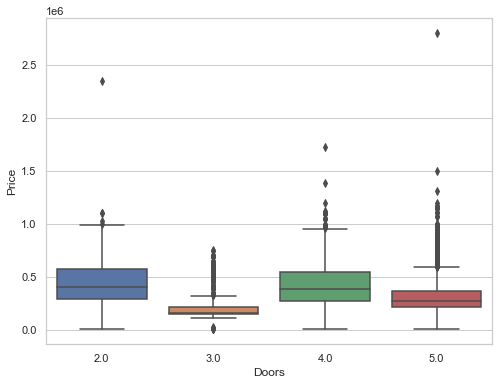

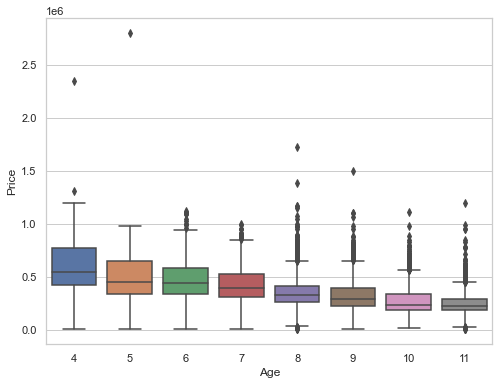

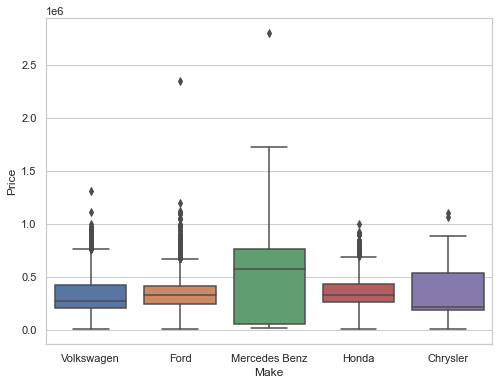

In [146]:
num  = ['Doors', 'Age', 'Make']

for var in num:
    #print(i)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="Price", data=df)

In [104]:
outlier_equal_zero(df_outlier, 'Doors')

lower bound :2.5 , upper bound : 6.5
Q1 :4.0 , Q3 :5.0


5.0

In [101]:
df_outlier.describe()

,Year,Kms,Price,Doors,Age
count,9751.0000,9751.0000,9751.0000,9751.0000,9751.0000
mean,2013.2977,74394.0795,349254.5836,4.2985,8.7023
std,1.8170,35178.9965,176892.8019,0.8884,1.8170
min,2011.0000,5094.0000,6300.0000,2.0000,4.0000
25%,2012.0000,49000.0000,229200.0000,4.0000,7.0000
50%,2013.0000,73000.0000,300000.0000,5.0000,9.0000
75%,2015.0000,97000.0000,430000.0000,5.0000,10.0000
max,2018.0000,218000.0000,2800000.0000,5.0000,11.0000


In [97]:
df.describe()

,Year,Kms,Price,Doors,Age
count,9751.0000,9751.0000,9751.0000,9751.0000,9751.0000
mean,2013.2977,74394.0795,349254.5836,4.2985,8.7023
std,1.8170,35178.9965,176892.8019,0.8884,1.8170
min,2011.0000,5094.0000,6300.0000,2.0000,4.0000
25%,2012.0000,49000.0000,229200.0000,4.0000,7.0000
50%,2013.0000,73000.0000,300000.0000,5.0000,9.0000
75%,2015.0000,97000.0000,430000.0000,5.0000,10.0000
max,2018.0000,218000.0000,2800000.0000,5.0000,11.0000


In [159]:
df.columns

Index(['Make', 'Model', 'Year', 'Variant', 'Kms', 'Price', 'Doors', 'Kind',
       'Location', 'Age'],
      dtype='object')

In [167]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
X = df[['Year','Kms', 'Doors', 'Age']]  #independent columns
Y = df['Price']#target column i.e price range

# SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(mutual_info_regression, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

   Specs  Score
0   Year 0.1926
3    Age 0.1908
2  Doors 0.1756
1    Kms 0.1194
